In [1]:
%config StoreMagics.autorestore = True
%reset -f
# %store -z
%store -r
%whos

Variable           Type              Data/Info
----------------------------------------------
Tsam               float             0.1
dvMathcalP         LinearIOSystem    <LinearIOSystem>: sys[91]<...>[[0. 0.]\n     [0. 0.]]\n
extMathcalP        LinearIOSystem    <LinearIOSystem>: sys[90]<...> [0. 0.]\n     [0. 0.]]\n
fullOrder          int               84
hsvDvMathcalP      ndarray           84: 84 elems, type `float64`, 672 bytes
hsvExtMathcalP     ndarray           84: 84 elems, type `float64`, 672 bytes
mathcalC           StateSpace        A = [[-1000.]]\n\nB = [[1<...>0999]]\n\nD = [[100.1]]\n
mathcalP_cb        LinearIOSystem    <LinearIOSystem>: sys[20]<...>[[0. 0.]\n     [0. 0.]]\n
overlineMathcalC   StateSpace        A = [[-0.]]\n\nB = [[10.]<...>= [[100.1]]\n\ndt = 0.1\n
reducOrder         int               10
truncDvMathcalP    LinearIOSystem    <LinearIOSystem>: sys[93]<...>[[0. 0.]\n     [0. 0.]]\n
truncExtMathcalP   LinearIOSystem    <LinearIOSystem>: sys[92]<...> [0. 0

In [2]:
import numpy
import sympy
import scipy
import control
import matplotlib.pyplot as plt

from custom_utils import ControlUtils
from custom_utils import ODEUtils

from IPython.display import display
from IPython.display import Math
from IPython.display import Latex
from IPython.display import HTML

numpy.set_printoptions(precision=3)
sympy.init_printing(use_latex='mathjax', use_unicode=True)
sympy.init_printing()
plt.rcParams.update({ "text.usetex": True, "font.family": "Helvetica", "axes.titley": 1.0 })
%matplotlib inline

In [3]:
# Get plant
normInfTruncExtMathcalP = ControlUtils.hinfnorm(truncExtMathcalP)
display(Math('\\lVert \\widehat{\\mathcal{P}_{ext}} \\rVert_{\\infty} = ' + str(normInfTruncExtMathcalP)))

<IPython.core.display.Math object>

In [4]:
# Simulate response
T_step = Tsam/1000
t_ini = 0
t_fin = 5
steps = int(numpy.ceil((t_fin-t_ini)/T_step))

tkVec = numpy.arange(t_ini, t_fin, Tsam)[:, None]
tVec = numpy.linspace(t_ini, t_fin, steps)[:, None]
# uVec = 1e-4*numpy.sin(2*numpy.pi*tVec/0.1)
uVec = 1*numpy.sin(15*tVec)

xpVec, xcVec, vsVec, whVec = ODEUtils.solveSDLinearSystem(plant=truncExtMathcalP,
                                                          discrete_controller=overlineMathcalC,
                                                          xp0=0*numpy.random.rand(*(truncExtMathcalP.A.shape[0], 1)),
                                                          xc0=0*numpy.random.rand(*(overlineMathcalC.A.shape[0], 1)),
                                                          uVec=uVec, t_ini=t_ini, t_fin=t_fin, T_step=T_step, T_samps=tkVec)

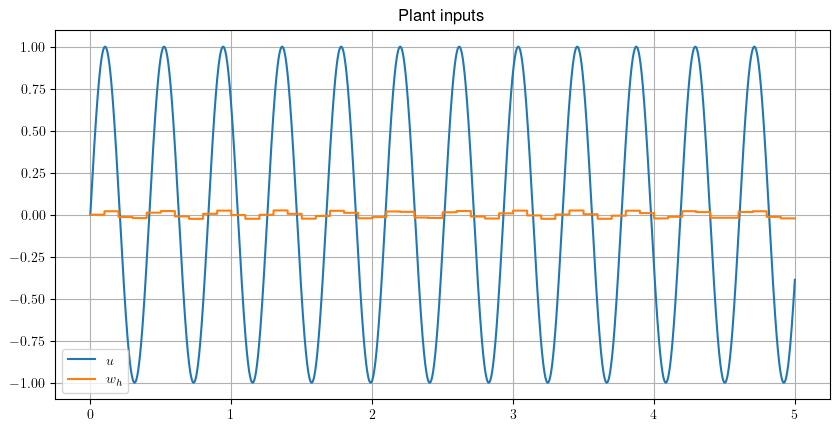

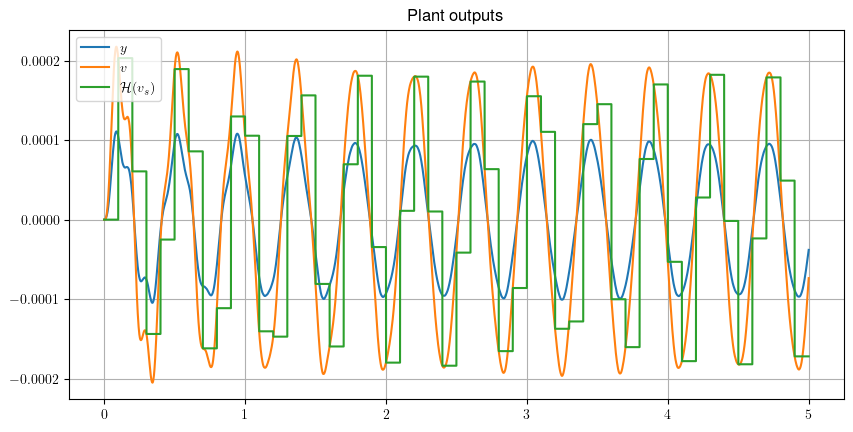

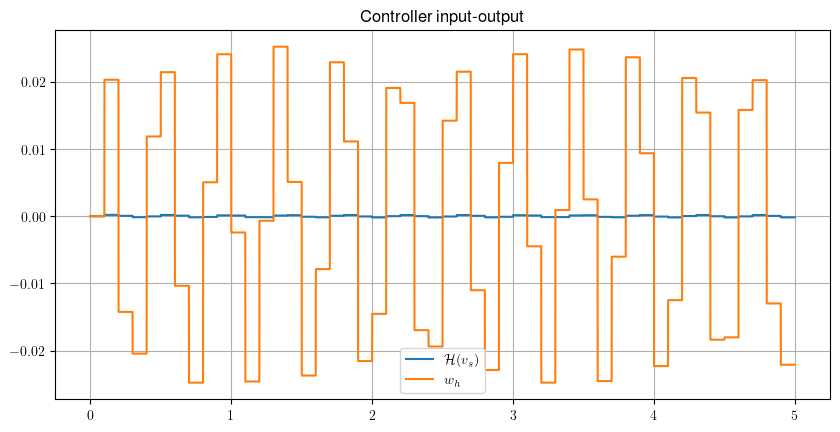

In [5]:
# Compute Reduced Extended Plant outputs
yVec = truncExtMathcalP.C[-1:,:] @ xpVec
vVec = truncExtMathcalP.C[0:1,:] @ xpVec

tLims = [t_ini,t_fin]
ODEUtils.plot_inputs(tVec=tVec,tLims=tLims,uVec=uVec,whVec=whVec)
ODEUtils.plot_outputs(tVec=tVec,tLims=tLims,vsVec=vsVec,yVec=yVec,vVec=vVec)
ODEUtils.plot_controller_io(tVec=tVec,tLims=tLims,vsVec=vsVec,whVec=whVec)